In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

In [2]:
gene_name = 'QKI'

pseudo_time = [str(i) for i in range(1, 10)]
pseudo_time_3D = dict()

for _dir in pseudo_time:
    file_path = None
    for root, _, files in os.walk('./{}/{}'.format(gene_name, _dir), topdown=False):
        for file_name in files:
            if file_name.split('.')[-1] == 'pdb':
                file_path = os.path.join(root, file_name)
                break

    with open(file_path, 'r') as f:
        _datas = f.readlines()[1:]
        _datas = [_data for _data in _datas if _data.startswith('ATOM')]
        _datas = [_data.split()[5:8] for _data in _datas]
        pseudo_time_3D[_dir] = np.array(_datas).astype('float')

pseudo_time_3D

{'1': array([[-5.608, -1.328, -3.179],
        [-2.806, -5.414,  0.244],
        [ 5.081, -3.66 ,  0.056],
        [ 1.405, -6.387,  1.616],
        [-5.898, -1.538,  2.679],
        [-1.442,  3.409,  6.424],
        [-0.837, -1.225,  5.558],
        [ 0.309, -4.393, -4.509],
        [ 5.055, -2.603,  7.154],
        [ 5.515,  0.56 , -2.725],
        [ 5.565,  2.391,  2.355],
        [ 1.323,  6.642,  1.978],
        [-3.197,  3.091,  1.326],
        [-2.768,  5.167, -1.545],
        [ 3.885,  5.026, -2.086],
        [ 1.72 ,  0.664, -6.188],
        [-3.652,  2.777, -7.482]]),
 '2': array([[-2.416, -0.583, -6.078],
        [-4.445,  3.09 , -1.382],
        [-3.82 ,  3.574,  3.784],
        [-1.315,  6.691, -1.093],
        [ 1.518,  4.609, -3.985],
        [ 2.493,  2.843,  6.455],
        [ 2.904,  4.195,  2.167],
        [ 4.377, -0.016, -4.988],
        [ 9.229,  2.87 ,  2.942],
        [ 2.156, -6.022,  1.222],
        [-1.577, -4.365,  4.076],
        [-3.606, -1.29 ,  5.961],
  

In [3]:
def rotate(points1, points2):
    if (points1 == points2).all():
        return points1
    # 求解协方差矩阵C
    centroid1 = np.mean(points1, axis=0)
    centroid2 = np.mean(points2, axis=0)
    demeaned1 = points1 - centroid1
    demeaned2 = points2 - centroid2
    C = np.dot(demeaned1.T, demeaned2)

    # 使用SVD分解C得到旋转矩阵R
    U, S, Vt = np.linalg.svd(C)
    R = np.dot(U, Vt)
    
    points_rotated = np.dot(points2, R)
    return points_rotated

for i in pseudo_time:
    pseudo_time_3D[i] = rotate(pseudo_time_3D[pseudo_time[0]], pseudo_time_3D[i])

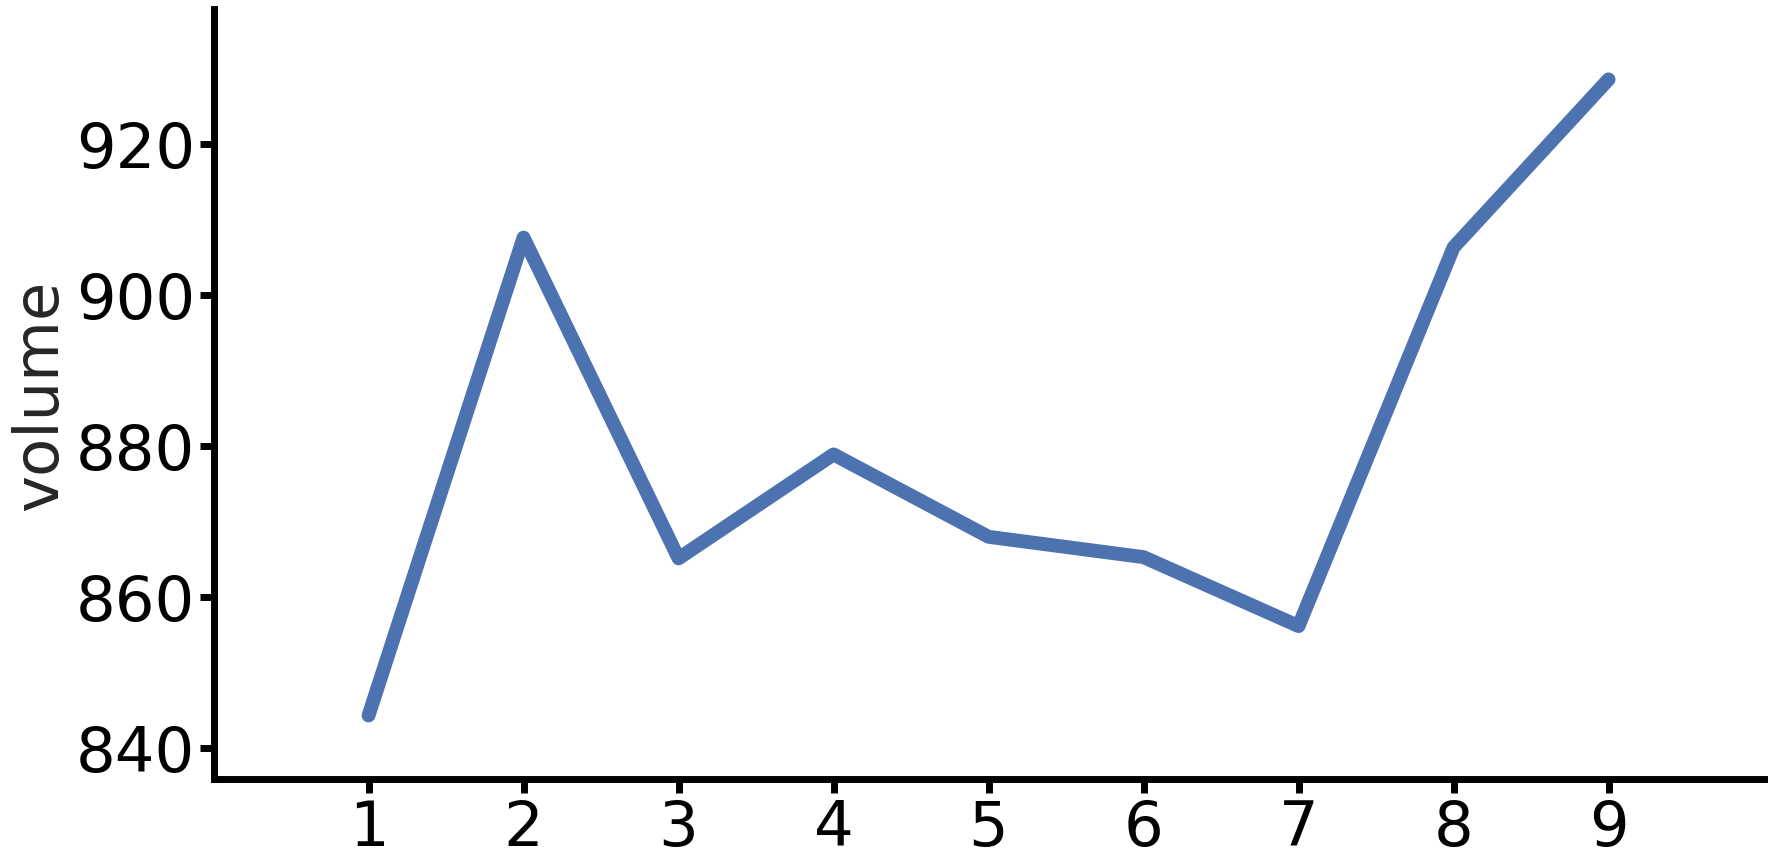

In [4]:
def calculate_volume(points):
    return ConvexHull(points).volume
volumes = [calculate_volume(pseudo_time_3D[i]) for i in pseudo_time]


import sys
sys.path.append('/lmh_data/work/SEE/analyse/')
from analyse_util import draw_pseudotime_line

draw_pseudotime_line(volumes, ylabel='volume',
                     save_dir_path='/lmh_data/work/SEE/analyse/figure_file/pseudo_time/{}/volume'.format(gene_name))

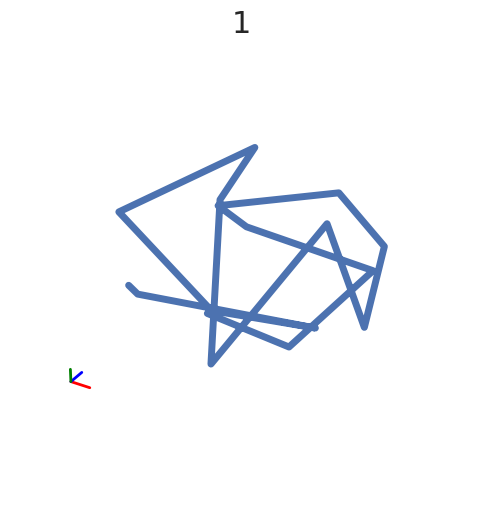

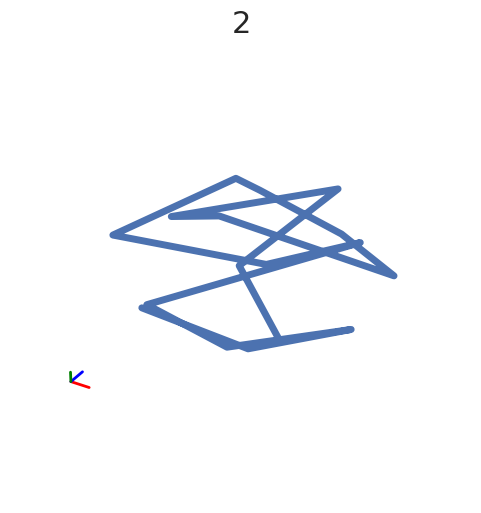

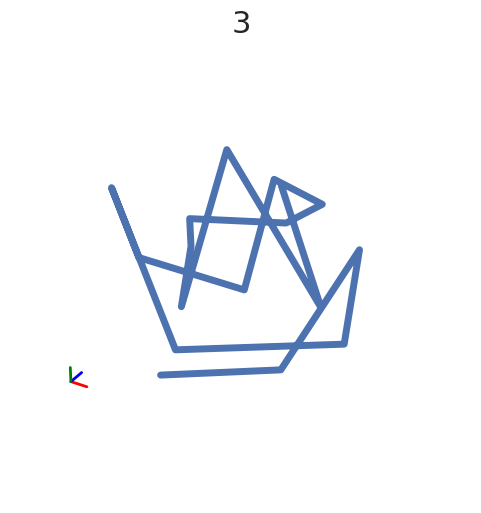

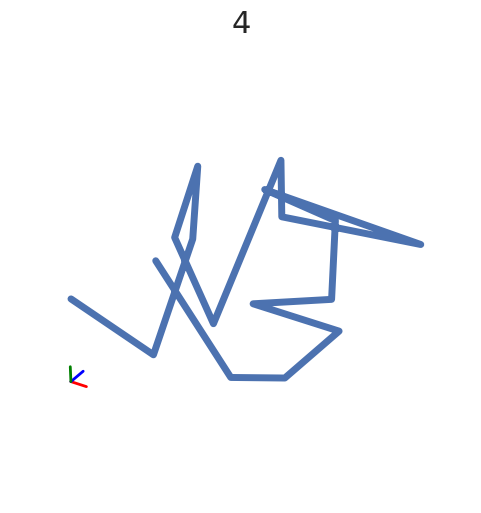

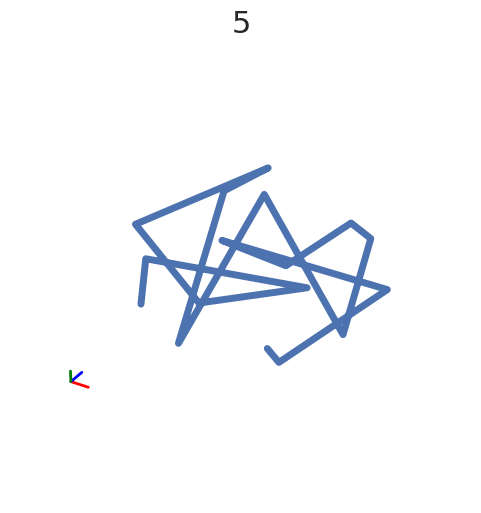

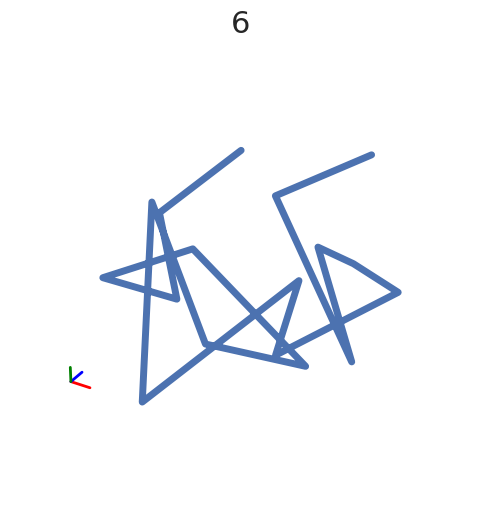

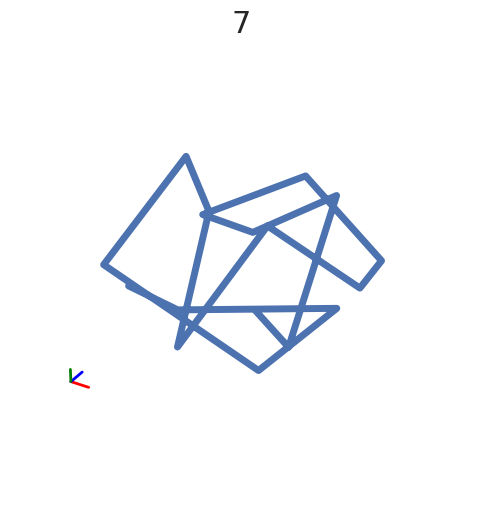

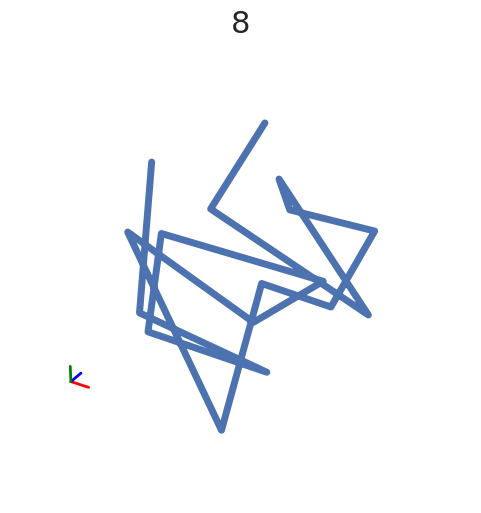

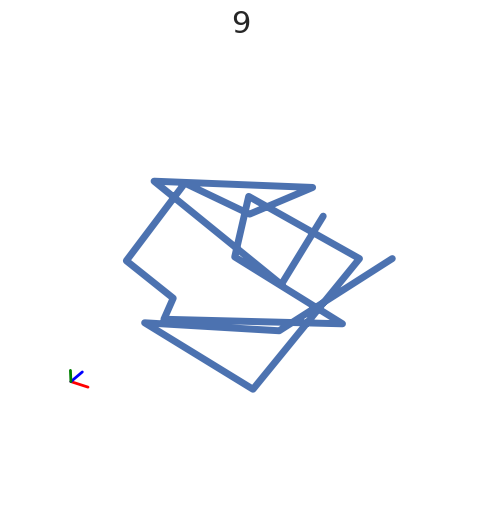

In [5]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

def show(points, title):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (6, 6),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    ax.plot(points[:, 0], points[:, 1], points[:, 2], '-', linewidth=5)

    origin = [min(points[:, 0]), min(points[:, 1]), min(points[:, 2])]
    ax.plot([origin[0], origin[0]+1], [origin[1], origin[1]], [origin[2], origin[2]], '-', color='red')
    ax.plot([origin[0], origin[0]], [origin[1], origin[1]+1], [origin[2], origin[2]], '-', color='blue')
    ax.plot([origin[0], origin[0]], [origin[1], origin[1]], [origin[2], origin[2]+1], '-', color='green')
    
#     fig.colorbar(scatter, ax=ax, fraction=0.02)
    ax.grid(False)
    ax.axis("off")

    plt.title('{}'.format(title))
    plt.savefig('/lmh_data/work/SEE/analyse/figure_file/pseudo_time/{}/3D/{}.pdf'.format(gene_name, title),
                format='pdf', bbox_inches='tight')
    plt.show()

for i in pseudo_time:
    show(pseudo_time_3D[str(i)], i)